# Objective : Predict the house price based on the given information.


### Step 1 Import dependenices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings 
from scipy.stats import skew
%matplotlib inline

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
warnings.filterwarnings('ignore')

# Step 2 Import  dataset

In [4]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ocean_proximity']= le.fit_transform(df['ocean_proximity'])
le_name = dict(zip(le.classes_, le.transform(le.classes_)))

# Step 3 Data Analysis

In [12]:
# Checking the datatypes of columns in the dataset
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity         int32
dtype: object

In [13]:
#checking number of numeric data in dataset
numeric_data = df.select_dtypes(include = ['float', 'int'])
len(numeric_data.columns)

10

In [14]:
#checking number of  categorical data in dataset
categorical_data= df.select_dtypes(include = 'object')
len(categorical_data.columns)

0

* In the given dataset there are 9 numberic variables and 1 categorical variable

In [20]:
# since we have one categorical data we will perform label encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])
print(dict(zip(le.classes_, le.transform(le.classes_))))


{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}


# Step 3 Data Analysis 

In [22]:
df.shape

(20640, 10)

* In the given dataset there are 20640 records(rows) and 10 features(columns)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [24]:
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


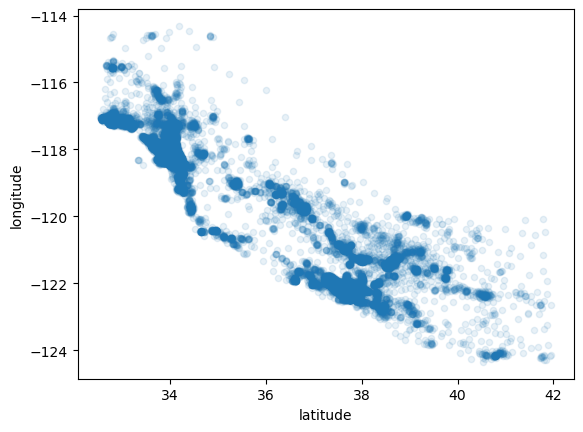

In [25]:
df.plot(kind = 'scatter', x = 'latitude', y = 'longitude', alpha = 0.1)
plt.show()

### Step 4 Check for assumptions

## Assumption 1 There should not be outliers in dataset

In [26]:
#plotting the boxplots to know if any column contains outliers

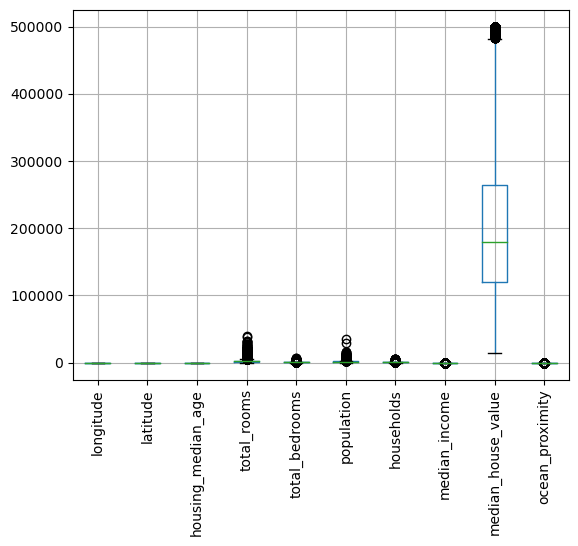

In [27]:
df.boxplot()
plt.xticks(rotation = 90)
plt.show();

# * From above graph we can say that there are outliers in the following columns
  1) total_rooms
  2) total_bedrooms
  3) population
  4) households
  5) median_income
  6) median_house_value

* There are cluster of outliers, hence we will not treat them

# checking for missing values

In [28]:
total = df.isnull().sum().sort_values(ascending = False)
percent =(df.isnull().sum()/len(df)*100).sort_values(ascending = False)
missing_data = pd.DataFrame()
missing_data['Total'] = total
missing_data['Percent'] = percent

In [29]:
missing_data

,Total,Percent
total_bedrooms,207,1.002907
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000
ocean_proximity,0,0.000000


* In the given dataset there is one column which has missing values in it namely total_bedrooms.

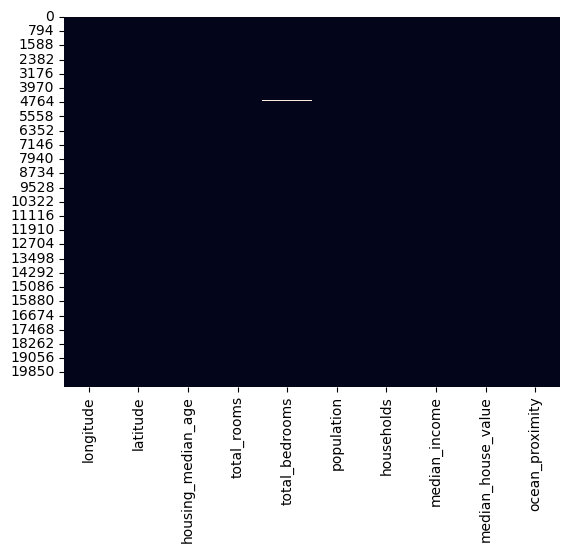

In [30]:
#missing value using heat map
sns.heatmap(df.isnull(), cbar = False)
plt.show()

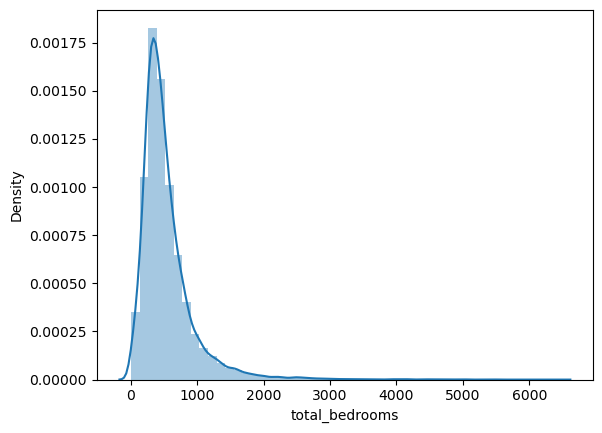

In [31]:
sns.distplot(df['total_bedrooms'], hist = True)
plt.show()


In [32]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(value = df['total_bedrooms'].median())

* Since the data is skewed we can use median to imputed the null values

# Assumption 2  : Every independent variable should have linear relation with dependent variable

In [33]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [34]:
independent_variables = ['longitude',
                     'latitude',
                     'housing_median_age',
                     'total_rooms',
                     'total_bedrooms',
                     'population',
                     'households',
                     'median_income',
                     'ocean_proximity']

<Figure size 2500x5000 with 0 Axes>

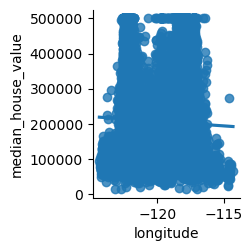

<Figure size 2500x5000 with 0 Axes>

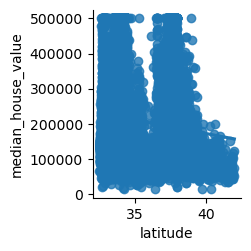

<Figure size 2500x5000 with 0 Axes>

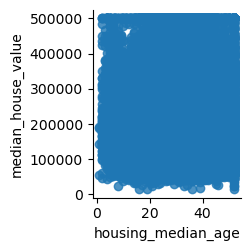

<Figure size 2500x5000 with 0 Axes>

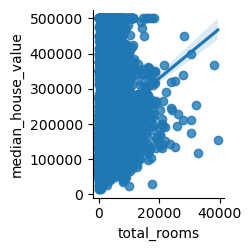

<Figure size 2500x5000 with 0 Axes>

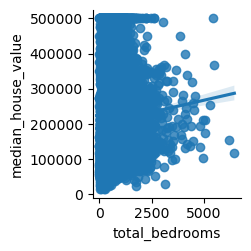

<Figure size 2500x5000 with 0 Axes>

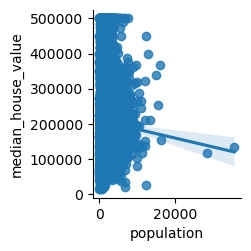

<Figure size 2500x5000 with 0 Axes>

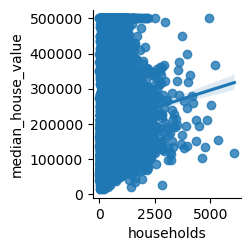

<Figure size 2500x5000 with 0 Axes>

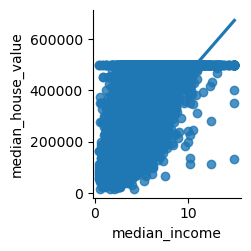

<Figure size 2500x5000 with 0 Axes>

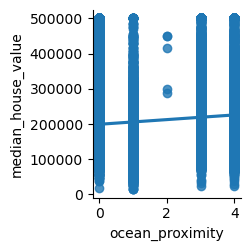

In [35]:
for i in independent_variables:
    plt.figure(figsize=(25,50))
    sns.pairplot(data = df,
             x_vars= i,
             y_vars= ['median_house_value'],
             kind = 'reg')
plt.show()

* positive linear relationship between total_rooms, total_bedrooms, households, median_income and median_house_value
* negative linear relationship between population and median_house_value
* weak relation between longitude, latitude, housing_median_age and median_house_value

# Assumption 3. Assumption of normality the dependent variable should follow almost normal distribution

In [36]:
x = df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population',
       'households','median_income']]
y = df['median_house_value']

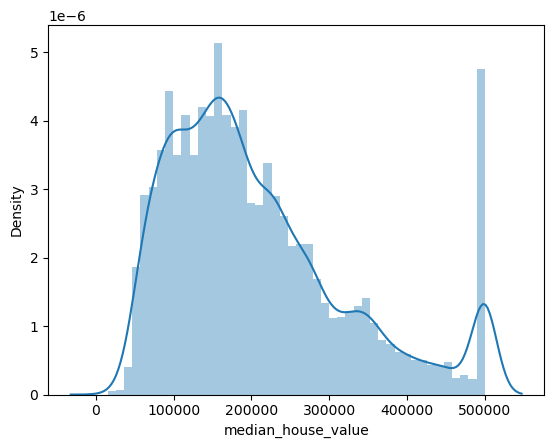

Skewness value =  0.9777632739098341


In [37]:
#checking the normality of dependent variable
sns.distplot(y,hist=True)
plt.show()
print('Skewness value = ', y.skew())

Here we can observe that independent variable is slightly used hence need to transform the y variable
we can perform tranformation in two ways 
1) log_transformation
2) sqrt_tranformation

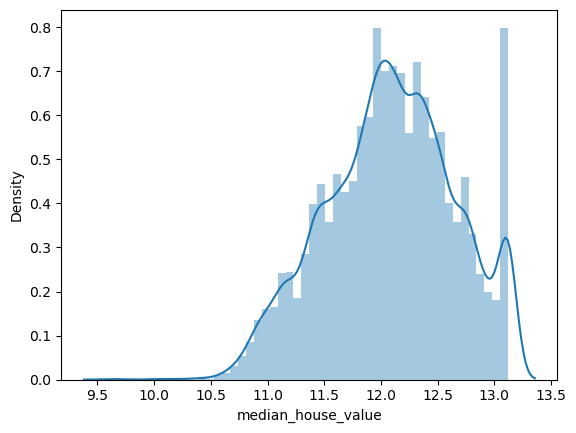

In [38]:
#log transformation
y_log = np.log(y)
sns.distplot(y_log, hist= True)
plt.show()

Even after log transformation y variable does not show normal distribution hence we will try to perform 
sqrt transformation

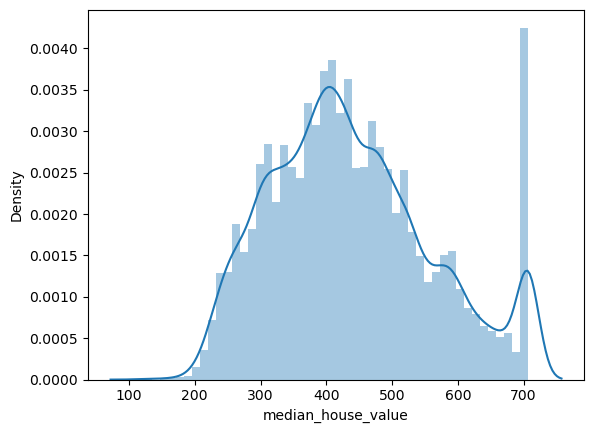

In [39]:
#Square transformation
sqr_y = np.sqrt(y)
sns.distplot(sqr_y, hist= True)
plt.show()
sqr_y = y

Since square root transformation is transforming the y values into normal distribution we will use square root transformation

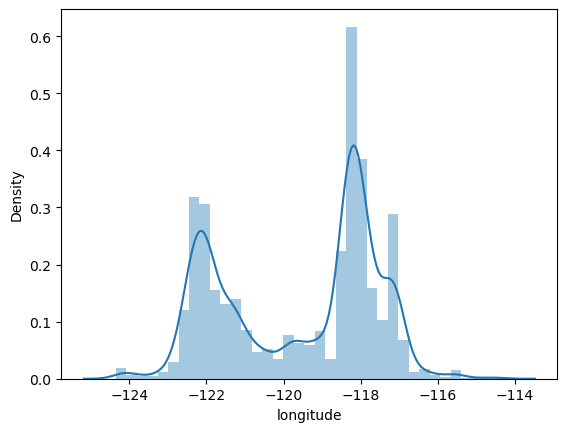

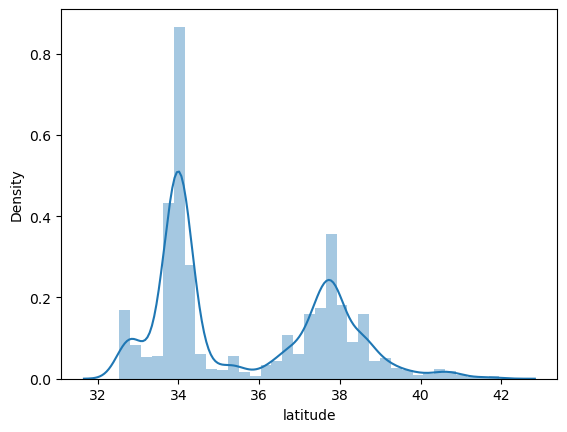

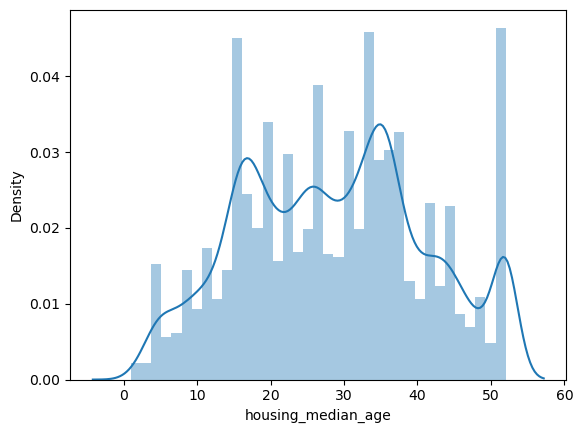

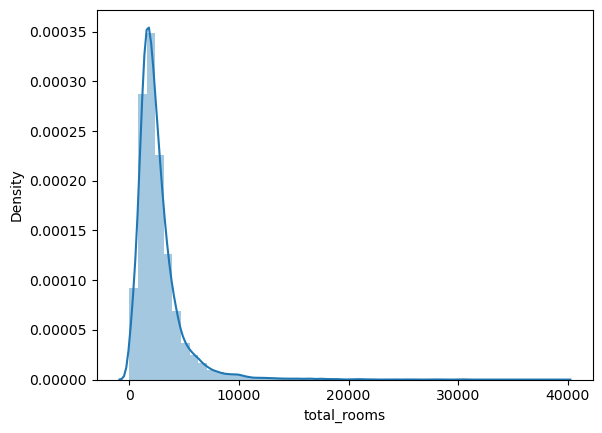

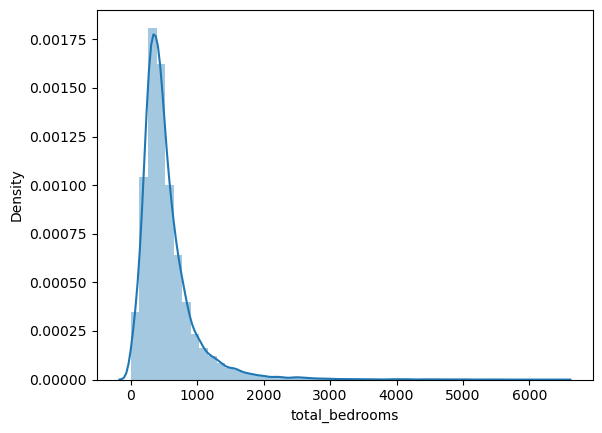

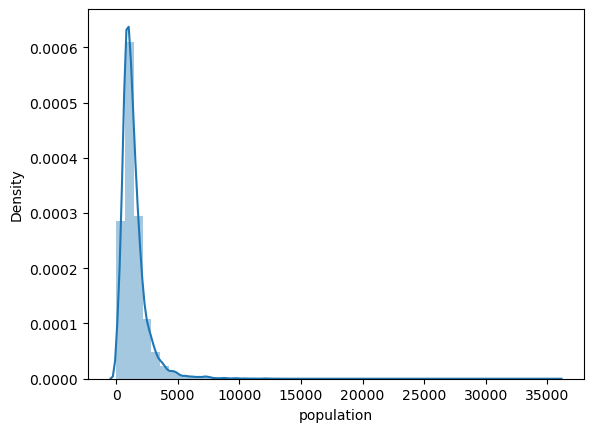

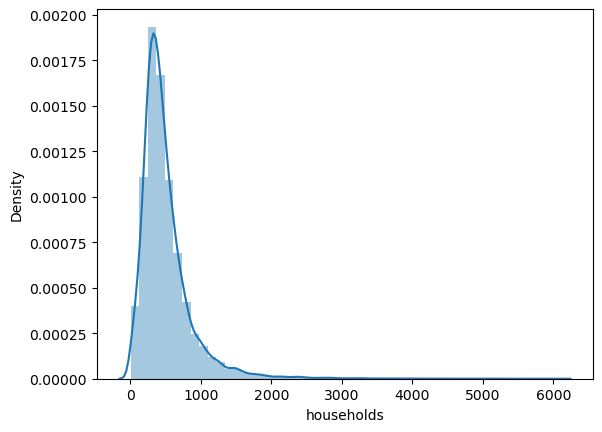

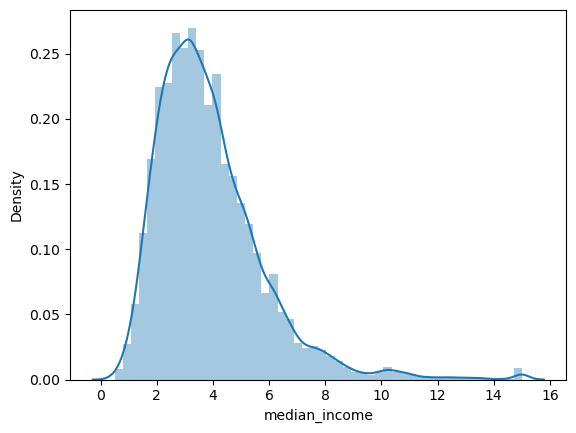

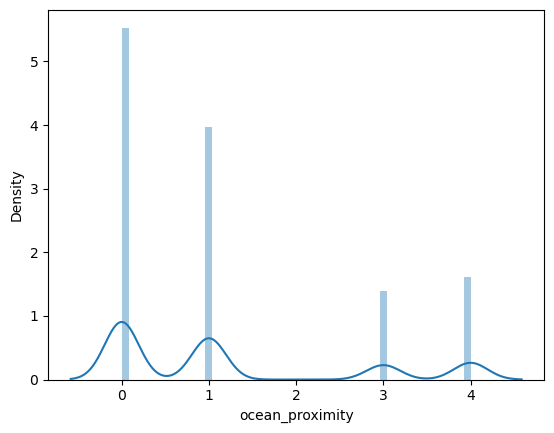

In [40]:
for i in independent_variables:
    sns.distplot(df[i], hist=True)
    plt.show()  

* From the above graphs we can say that independent variables are not follow normal distribution
hence we will future observe there skewness.

In [41]:
data_skew = x.apply(lambda x:skew(x.dropna())) 
print(data_skew)
data_skew1 = data_skew[(data_skew>0.75)|(data_skew<-0.75)]
data_skew1

longitude            -0.297780
latitude              0.465919
housing_median_age    0.060326
total_rooms           4.147042
total_bedrooms        3.480888
population            4.935500
households            3.410190
median_income         1.646537
dtype: float64


total_rooms       4.147042
total_bedrooms    3.480888
population        4.935500
households        3.410190
median_income     1.646537
dtype: float64

* Columns totalrooms, total_bedrooms, population, households, median_income are showing skewness 
beyond the acceptable skewness range we need to perform the transformation in those columns

In [42]:
x[data_skew1.index] = np.sqrt(x[data_skew1.index])

# Assumption 4. Multicollinearity 

* when Independent variables show can any relation between each other than it is called multicollinerity
* To check the multicolinearity we can use the pearson correlation or vif value

In [43]:
# checking multicollinearity using pearson's correlation
corr_data = (x.corr(method='pearson'))
corr_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.924664,-0.108197,0.038763,0.068769,0.114055,0.058733,-0.015569
latitude,-0.924664,1.000000,0.011173,-0.035313,-0.071012,-0.131999,-0.083586,-0.084303
housing_median_age,-0.108197,0.011173,1.000000,-0.371151,-0.319948,-0.298206,-0.297129,-0.132797
total_rooms,0.038763,-0.035313,-0.371151,1.000000,0.931113,0.858390,0.924613,0.246993
total_bedrooms,0.068769,-0.071012,-0.319948,0.931113,1.000000,0.885963,0.973521,0.001823
population,0.114055,-0.131999,-0.298206,0.858390,0.885963,1.000000,0.920795,0.015641
households,0.058733,-0.083586,-0.297129,0.924613,0.973521,0.920795,1.000000,0.030727
median_income,-0.015569,-0.084303,-0.132797,0.246993,0.001823,0.015641,0.030727,1.000000


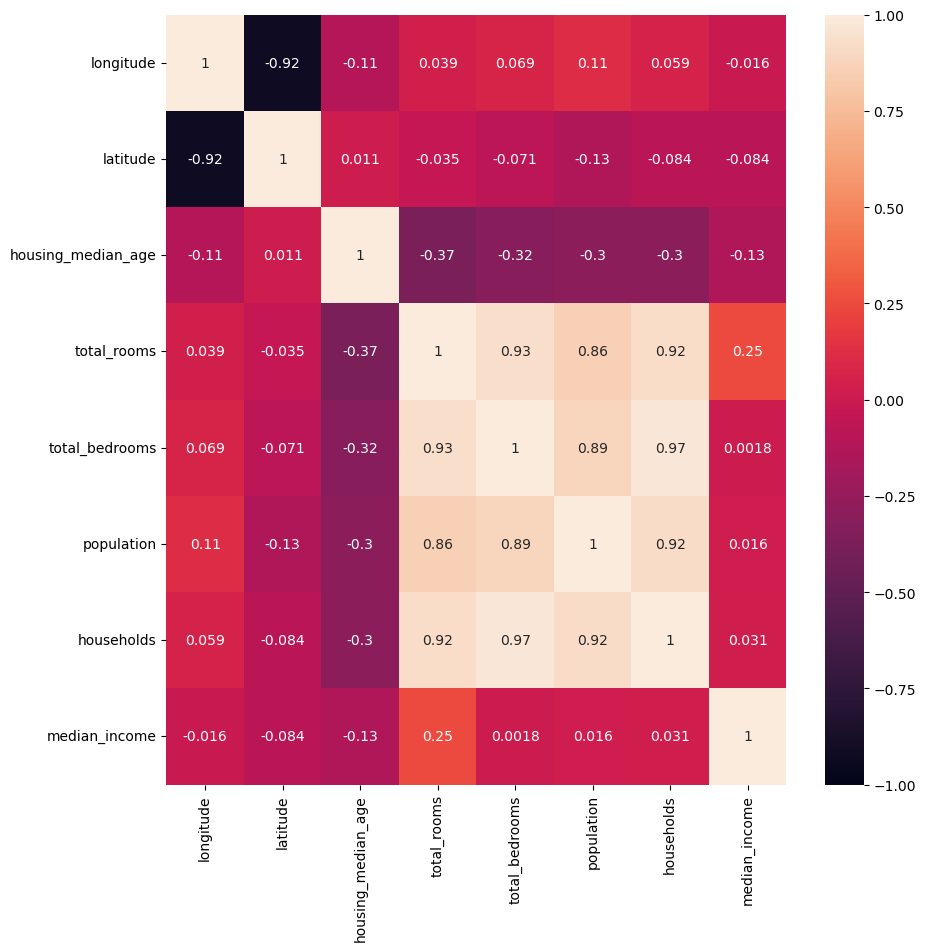

In [44]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_data, vmax=1.0, vmin=-1.0, annot= True)
plt.show();

In [5]:
# Multocollinearity using vif 

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 

In [46]:
vif_data = pd.DataFrame()
vif_data['Features']= x.columns
vif_data['Vif_factor'] = [vif(x.values,i) for i in range(x.shape[1])]
vif_data.sort_values(ascending = False, by = 'Vif_factor')

,Features,Vif_factor
0,longitude,799.336829
1,latitude,602.998188
6,households,270.471342
4,total_bedrooms,264.426579
3,total_rooms,145.344444
5,population,66.197446
7,median_income,39.572909
2,housing_median_age,7.450887


vif values should not be greater than 10 hence we can drop columns with vif greater than 10

 But as we are eliminating the columns, the accuracy is decreasing hence we keep those variables

# Splitting the data into train and test

In [47]:
 from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3)  

In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14448, 8)
(14448,)
(6192, 8)
(6192,)


# Scaling the values

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [50]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [51]:
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

# Model building

### Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
#create a model
lm = LinearRegression()
lm.fit(x_train_scaler,y_train)

LinearRegression()

In [53]:
print('Intercept',lm.intercept_)
print('Cofficient',lm.coef_)

Intercept 266223.0357322616
Cofficient [-401721.32370162 -381498.43498699   59169.41727818 -288459.53120437
  503512.78105025 -881654.68874181  416939.7245879   548312.22791841]


In [54]:
print(list(zip(x_train.columns, lm.coef_)))

[('longitude', -401721.3237016193), ('latitude', -381498.43498699355), ('housing_median_age', 59169.41727818045), ('total_rooms', -288459.5312043688), ('total_bedrooms', 503512.7810502461), ('population', -881654.6887418149), ('households', 416939.72458790074), ('median_income', 548312.2279184123)]


In [55]:
y_predict = lm.predict(x_test_scaler)
y_predict = pd.Series(y_predict)
data_predicted =pd.DataFrame()

In [56]:
data_predicted = x_test
data_predicted['actual'] = y_test
data_predicted['predicted'] = y_predict
data_predicted['Error'] = abs(y_test-y_predict)

In [57]:
data_predicted

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,actual,predicted,Error
15501,-117.26,33.09,13.0,61.073726,27.586228,36.537652,24.556058,2.041250,227100.0,NaN,NaN
12552,-121.48,38.56,52.0,28.530685,14.696938,18.083141,13.453624,1.689438,125000.0,NaN,NaN
17332,-120.01,34.54,30.0,54.699177,24.677925,35.888717,21.563859,1.984313,292900.0,NaN,NaN
4140,-118.17,34.12,30.0,58.103356,26.832816,44.609416,26.925824,1.944557,232000.0,112392.532898,119607.467102
9918,-122.31,38.32,33.0,49.628621,20.518285,35.142567,21.563859,1.924708,161500.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3368,-120.20,40.26,26.0,48.979588,22.759613,32.202484,21.047565,1.636001,47600.0,267458.941172,219858.941172
11827,-121.02,39.01,17.0,69.180922,28.266588,45.453273,27.748874,1.993339,185400.0,NaN,NaN
20365,-118.92,34.18,17.0,48.989795,18.761663,32.664966,17.972201,2.520357,259300.0,NaN,NaN
1180,-121.54,39.47,14.0,41.521079,17.748239,30.643107,17.378147,1.579620,53900.0,249249.051725,195349.051725


In [59]:
from sklearn.metrics import r2_score, mean_squared_error
r2_lin = r2_score(y_test, y_predict)
print('R-2(Linear) : ',r2_lin)
adjusted_R2_lin = 1-(1-r2_lin)*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted_R_2(linear) :', adjusted_R2_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_predict))
print('RMSE(linear) :',rmse_lin)

R-2(Linear) :  0.638577277535836
Adjusted_R_2(linear) : 0.6384371300984983
RMSE(linear) : 69304.0005637391


### Ridge regression

In [60]:
from sklearn.linear_model import Ridge

In [61]:
ridge = Ridge(alpha=0.01)

ridge.fit(x_train_scaler, y_train)

Ridge(alpha=0.01)

In [62]:
y_predict_ridge = ridge.predict(x_test_scaler)

In [65]:
from sklearn.metrics import r2_score, mean_squared_error
r2_ridge = r2_score(y_test, y_predict_ridge)
print('R-2(ridge): ',r2_ridge)
adjusted_R2_ridge = 1-(1-r2_ridge)*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted_R_2 (ridge):', adjusted_R2_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_predict_ridge))
print('RMSE (ridge):',rmse_ridge)

R-2(ridge):  0.638568551866887
Adjusted_R_2 (ridge): 0.6384284010460317
RMSE (ridge): 69304.83714660777


### Lasso regression

In [66]:
from sklearn.linear_model import Lasso

In [67]:
lasso = Lasso(alpha = 0.01)
lasso.fit(x_train_scaler, y_train)

Lasso(alpha=0.01)

In [68]:
y_predict_lasso = lasso.predict(x_test_scaler)

In [70]:

r2_lasso = r2_score(y_test, y_predict_lasso)
print('R-2(lasso) : ',r2_lasso)
adjusted_R2_lasso = 1-(1-r2_lasso)*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted_R_2 (lasso) :', adjusted_R2_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_predict_lasso))
print('RMSE(lasso) :',rmse_lasso)

R-2(lasso) :  0.6385770256039071
Adjusted_R_2 (lasso) : 0.6384368780688787
RMSE(lasso) : 69304.02471812456


In [71]:
#comparing all models evaluation matrix

In [72]:
evaluation = pd.DataFrame()
evaluation['Models'] = ['Linear', 'Ridge', 'Lasso']
evaluation['R2'] = [round(r2_lin,3), round(r2_ridge,3), round(r2_lasso,3)]
evaluation['Adjusted_R2'] =  [round(adjusted_R2_lin,3),round(adjusted_R2_ridge,3), round(adjusted_R2_lasso,3)]
evaluation['RMSE'] = [round(rmse_lin,3), round(rmse_ridge,3), round(rmse_lasso,3)]

In [73]:
evaluation

,Models,R2,Adjusted_R2,RMSE
0,Linear,0.639,0.638,69304.001
1,Ridge,0.639,0.638,69304.837
2,Lasso,0.639,0.638,69304.025
